In [7]:
import pandas as pd
import numpy as np


# Load latency samples
df_resampled = pd.read_csv('cloud_network_latency.csv')

# Convert the 'Timestamp' column to datetime type
df_resampled['Timestamp'] = pd.to_datetime(df_resampled['Timestamp'])

# Set 'Timestamp' as the index
df_resampled = df_resampled.set_index('Timestamp')

# Group the data by hour and calculate the mean for each hour
df_grouped = df_resampled.groupby(df_resampled.index.hour).mean()

# If you want to see the result
df_grouped.to_csv('hour_cloud_network_latency.csv')


/home/vmadmin/.venv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/vmadmin/.venv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/vmadmin/.venv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/vmadmin/.venv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/vmadmin/.venv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covarian

Optimized parameters for Latency us-east-1 wl1-mia-wlz-1 are [-2.10863095  7.36160714 -1.18154762 48.18571429]
RMSE for Latency us-east-1 wl1-mia-wlz-1 is 3.552713678800501e-15
Optimized parameters for Latency us-east-1 mia-1a are [-0.36309524  0.76785714  1.86666667 25.44285714]
RMSE for Latency us-east-1 mia-1a is 0.0
Optimized parameters for Latency us-east-1 wl1-nyc-wlz-1 are [-0.22172619 -0.37053571  3.7922619  12.95714286]
RMSE for Latency us-east-1 wl1-nyc-wlz-1 is 0.0
Optimized parameters for Latency us-east-1 nyc-1a are [-0.82261905  3.15357143 -1.88809524  7.34285714]
RMSE for Latency us-east-1 nyc-1a is 1.3322676295501878e-15
Optimized parameters for Latency wl1-mia-wlz-1 mia-1a are [-4.11011905 14.20178571 -3.06309524 61.97142857]
RMSE for Latency wl1-mia-wlz-1 mia-1a is 7.105427357601002e-15
Optimized parameters for Latency wl1-nyc-wlz-1 nyc-1a are [-0.77440476  2.6875     -0.4702381   6.45714286]
RMSE for Latency wl1-nyc-wlz-1 nyc-1a is 1.2560739669470201e-15


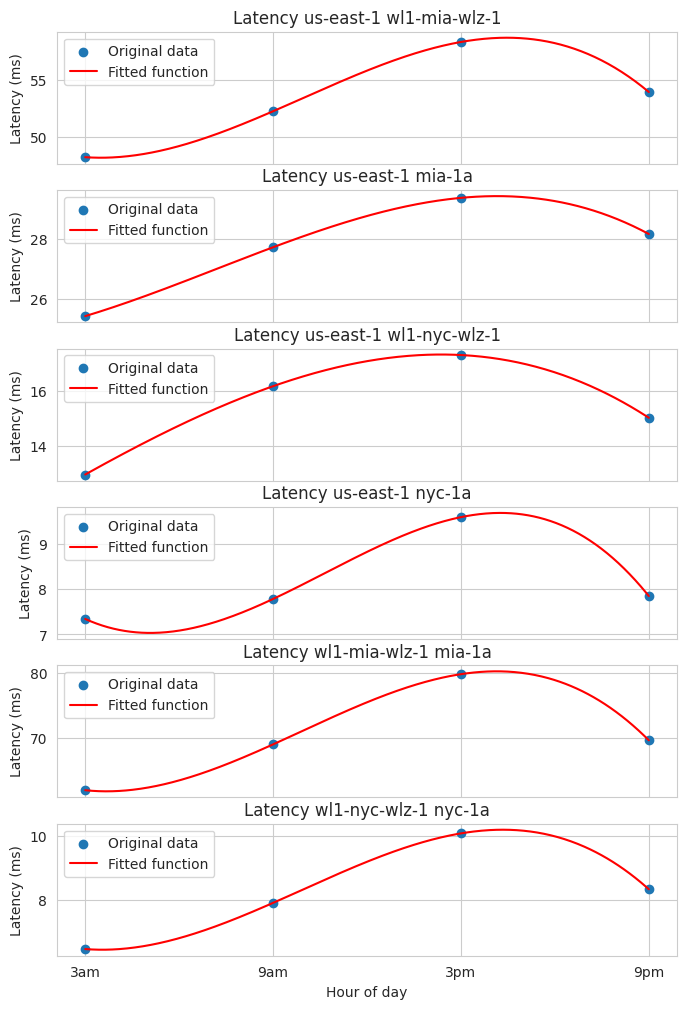

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from math import sqrt

# Read the data
df = pd.read_csv('hour_cloud_network_latency.csv')

# Map the Timestamps to specific intervals (3am = 0, 9am = 1, 3pm = 2, 9pm = 3)
time_mapping = {3:0, 9:1, 15:2, 21:3}
df['Timestamp'] = df['Timestamp'].map(time_mapping)

# Define the non-linear function
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

# Generate x values
x = df['Timestamp'].values

fig, axs = plt.subplots(len(df.columns[1:]), sharex=True, figsize=(8, 2*len(df.columns[1:])))

# For each latency column in the dataframe
for ax, col in zip(axs, df.columns[1:]):
    # Get the y values from the dataframe
    y = df[col].values

    # Use curve_fit to fit the non-linear function to the data
    popt, pcov = curve_fit(func, x, y)

    # popt contains the optimized parameters of the non-linear function
    print(f"Optimized parameters for {col} are {popt}")

    # Calculate the fitted y values
    y_fit = func(x, *popt)
    
    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(y, y_fit))
    print(f"RMSE for {col} is {rmse}")

    # Plot the original data points
    ax.scatter(x, y, label='Original data')

    # Generate x values for the fitted function
    x_fit = np.linspace(min(x), max(x), 500)

    # Compute the y values for the fitted function
    y_fit = func(x_fit, *popt)

    # Plot the fitted function
    ax.plot(x_fit, y_fit, 'r', label='Fitted function')

    # Set the title and labels
    ax.set_title(col)
    ax.set_ylabel('Latency (ms)')

    # Adjust x-axis to represent 24 hours day
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(['3am', '9am', '3pm', '9pm'])

    # Display the legend
    ax.legend()

# Set the xlabel for the whole figure
axs[-1].set_xlabel('Hour of day')

# Show the plot
# Show the plot
plt.savefig('cloud_network_latency_curve.pdf', bbox_inches='tight')
plt.savefig('cloud_network_latency_curve.png', dpi=300, bbox_inches='tight')
plt.show()